## Dataset escolhido
Chuvas na Austrália. 

Disponível em: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/discussion/485344

Contém 10 anos de observações climáticas de diversas estações meteorológicas na Austrália.

## Tarefa de predição
Classificar se no dia após a observação irá chover, tendo como variável alvo **RainTomorrow**.

## Tamanho do Conjunto de dados
O dataset contém **145.460** registros.

É dividido em **23 colunas** (características), sendo elas:


### 1. Date

**Tipo**: Numérica Contínua.

A data de observação do registro.

### 2. Location

**Tipo**: Categórica Nominal.

Nome da localização de onde está instalada a estação meteorológica.

### 3. MinTemp

**Tipo**: Numérica Contínua.

Temperatura mínima do dia do registro.

### 4. MaxTemp

**Tipo**: Numérica Contínua.

Temperatura máxima do dia do registro.

### 5. RainFall

**Tipo**: Numérica Contínua.

A quantidade de chuva registradas no dia, medidas em milímetros (mm).

### 6. Evaporation

**Tipo**: Numérica Contínua.

Evaporação medida nas últimas 24 do dia, medida em milímetros (mm).

### 7. Sunshine

**Tipo**: Numérica Contínua.

Quantidade de horas de luz solar durante o dia.

### 8. WindGustDir

**Tipo**: Categórica Nominal.

A direção de rajada mais forte do vento durante o dia.

### 9. WindGustSpeed

**Tipo**: Numérica Contínua.

Velocidade da rajada de vento mais forte durante o dia.

### 10. WindDir9am

**Tipo**: Categórica Nominal.

Direção do vento às 9h da manhã.

### 11 WindDir3pm

**Tipo**: Categórica Nominal.

Direção do vento às 15h da tarde.

### 12. WindSpeed9am

**Tipo**: Numérica Contínua.

Velocidade média do vento (Km/h) durante 10 minutos antes das 9h da manhã.

### 13. WindSpeed3pm

**Tipo**: Numérica Contínua.

Velocidade média do vento (Km/h) durante 10 minutos antes das 15h da tarde.

### 14. Humidity9am

**Tipo**: Numérica Contínua.

Umidade em percentual às 9h da manhã.

### 15. Humidity3pm

**Tipo**: Numérica Contínua.

Umidade em percentual às 15h da tarde.

### 16. Pressure9am

**Tipo**: Numérica Contínua.

Pressão atmosférica (hpa (hectopascais)) ajustada ao nível do mar às 9h da manhã.

### 17. Pressure3pm

**Tipo**: Numérica Contínua.

Pressão atmosférica (hpa (hectopascais)) ajustada ao nível do mar às 15h da tarde.

### 18. Cloud9am

**Tipo**: Categórica Ordinal.

Fração do céu obscurecido por nuvens às 9h da manhã. Medido em oktas (divisão do céu em 8 partes iguais). 0 indica céu limpo enquanto 8 está completamente nublado.

### 19. Cloud3pm

**Tipo**: Categórica Ordinal.

Fração do céu obscurecido por nuvens às 15h da tarde. Medido em oktas (divisão do céu em 8 partes iguais). 0 indica céu limpo enquanto 8 está completamente nublado.

### 20. Temp9am

**Tipo**: Numérica Contínua.

Temperatura (em Celsius) às 9h da manhã.

### 21. Temp3pm

**Tipo**: Numérica Contínua.

Temperatura (em Celsius) às 15h da tarde.

### 22. RainToday

**Tipo**: Categórica Nominal.

Indica se choveu ou não no dia do registro.

### 23. RainTomorrow

**Tipo**: Categórica Nominal.

Indica se choveu ou não no dia seguinte do registro. E também, a variável à ser classificada.

## Interpretando o dataset

In [3]:
import pandas as pd
dataframe = pd.read_csv("weatherAUS.csv")
dataframe.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### Vamos ver agora a proporção de cada Classe

In [4]:
columns = dataframe.columns.tolist()

for col in columns:
  #Com o normalize = True, irá retornar em percentual (E para ficar legível, multiplicamos por 100)
  proportion = dataframe[col].value_counts(normalize=True) * 100
  print(proportion)
  print("-----------")

Date
2017-06-18    0.033686
2017-06-19    0.033686
2017-06-20    0.033686
2017-06-21    0.033686
2017-06-22    0.033686
                ...   
2008-01-27    0.000687
2008-01-28    0.000687
2008-01-29    0.000687
2008-01-30    0.000687
2008-01-31    0.000687
Name: proportion, Length: 3436, dtype: float64
-----------
Location
Canberra            2.362161
Sydney              2.298914
Adelaide            2.195105
Darwin              2.195105
Hobart              2.195105
Perth               2.195105
Melbourne           2.195105
Brisbane            2.195105
Albury              2.089922
MountGinini         2.089922
GoldCoast           2.089922
Wollongong          2.089922
MountGambier        2.089922
Launceston          2.089922
AliceSprings        2.089922
Albany              2.089922
Townsville          2.089922
Bendigo             2.089922
Cairns              2.089922
Ballarat            2.089922
Penrith             2.089234
Newcastle           2.089234
Tuggeranong         2.089234
PerthAi

Como o dataset contém variações meteorológicas, algumas características contínuas apresentam grandes flutuações, uma vez que alterações de temperatura e velocidade do vento, por exemplo, são extremamente sensíveis.

## Onde há valores nulos?

In [5]:
print(dataframe.isnull().sum())

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


## Transformação e tratamento dos dados

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
# https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package
# dataframe = pd.read_csv("weatherAUS.csv")

# Alterando as variáveis No e Yes para inteiro (0 e 1)
dataframe["RainToday"] = dataframe["RainToday"].map({"No": 0, "Yes": 1})

# Tratando as datas
dataframe["Date"] = pd.to_datetime(dataframe["Date"])
dataframe["Year"] = dataframe["Date"].dt.year
dataframe["Month"] = dataframe["Date"].dt.month
dataframe["Day"] = dataframe["Date"].dt.day
dataframe.drop(columns=["Date"], inplace=True)

########## Tratando valores ausentes
# Calculando a media por localização e mês
"""
dataframe["Evaporation"] = dataframe["Evaporation"].replace(["NA"], np.nan)
dataframe["Sunshine"] = dataframe["Sunshine"].replace(["NA"], np.nan)

location_mean_evaporation = dataframe.groupby(["Location", "Month"])["Evaporation"].transform("mean")
location_mean_sunshine = dataframe.groupby(["Location", "Month"])["Sunshine"].transform("mean")
location_mean_min_temp = dataframe.groupby(["Location", "Month"])["MinTemp"].transform("mean")
location_mean_max_temp = dataframe.groupby(["Location", "Month"])["MaxTemp"].transform("mean")
location_mean_rainfall = dataframe.groupby(["Location", "Month"])["Rainfall"].transform("mean")
location_mean_windGustSpeed = dataframe.groupby(["Location", "Month"])["WindGustSpeed"].transform("mean")

dataframe['Evaporation'] = dataframe['Evaporation'].fillna(location_mean_evaporation)
dataframe['Sunshine'] = dataframe['Sunshine'].fillna(location_mean_sunshine)
dataframe['MinTemp'] = dataframe['MinTemp'].fillna(location_mean_min_temp)
dataframe['MaxTemp'] = dataframe['MaxTemp'].fillna(location_mean_max_temp)
dataframe['Rainfall'] = dataframe['Rainfall'].fillna(location_mean_rainfall)
dataframe['WindGustSpeed'] = dataframe['WindGustSpeed'].fillna(location_mean_windGustSpeed)
"""

#Estava fazendo tudo um a um até lembrar que existe o FOR :) 
#Capturando somente as variaveis numericas, visto que, as categoricas não fazem sentido tirar a média
numeric_columns = dataframe.select_dtypes(include=[np.number]).columns.tolist()
columns_with_nulls_numeric = dataframe[numeric_columns].columns[dataframe[numeric_columns].isnull().any()].to_list()
for column in columns_with_nulls_numeric:
  location_month_mean_value = dataframe.groupby(["Location", "Month"])[column].transform("mean")
  dataframe[column] = dataframe[column].fillna(location_month_mean_value)


# Quando uma location está completamente sem valores para determinada região, vamos tentar tirar a media do mes na respectiva
numeric_columns = dataframe.select_dtypes(include=[np.number]).columns.tolist()
columns_with_nulls_numeric = dataframe[numeric_columns].columns[dataframe[numeric_columns].isnull().any()].to_list()
for column in columns_with_nulls_numeric:
  mean_value_month = dataframe.groupby(["Month"])[column].transform("mean")
  dataframe[column] = dataframe[column].fillna(mean_value_month)

# Criando uma label (ID) para os valores em string
label_encoder = LabelEncoder()
dataframe["Location"] = label_encoder.fit_transform(dataframe["Location"])
dataframe["WindGustDir"] = label_encoder.fit_transform(dataframe["WindGustDir"])
dataframe["WindDir9am"] = label_encoder.fit_transform(dataframe["WindDir9am"])
dataframe["WindDir3pm"] = label_encoder.fit_transform(dataframe["WindDir3pm"])

# Dataframe depois dos devidos tratamentos
dataframe.head()

dataframe.to_csv("after_process.csv", index=False)

Como podemos ver na etapa de transformação e tratamento, temos alguns pontos importantes dessa etapa:

1 - A variávell RainToday foi transformada para valores binários.

2 - A data estava em formato de String (2008-01-01) e para a mesma foram criadas as colunas de dia, mês e ano. Após essa transformação, o campo original de Date foi excluído.

3 - Para as colunas com valores nulos, usei a estratégia de agrupar por Localização e mês e tirar a média para o registro faltante.

4 - Caso uma localização inteira não tenha registro, foi utilizado a média global daquela característica.

5 - Para as variáveis categóricas, foi utilizado o LabelEnconder, que dá à elas um ID, visto que, os algorítmos que estamos trabalhando não aceitam valores em strings. Por exemplo, direção do vendo NORTE assumiu o valor 1, direção do vento NORTE->SUL, assumiu o valor 2, e assim sucessivamente. 

  As seguintes caracteristicas categórias foram transformadas: Location, WindGustDir, WindDir9am e WindDir3pm.

## Verificando se em alguma coluna ainda há valores nulos

In [7]:
print(dataframe.isnull().sum())

Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow     3267
Year                0
Month               0
Day                 0
dtype: int64


#### A única coluna com valores nulos é a RainTomorrow, que é justamente a que iremos dropar (pois é ela que vamos responder). Não foi removida antes para não impactar nas médias globais.

# Divisão em conjuntos de treinamento e teste

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Cria um novo dataframe dropando a coluna alvo com valores  nulos
dataframe_cleaned = dataframe.dropna(subset=["RainTomorrow"]).copy()

# Coluna alvo, ou seja, o que quero identificar, convertida para 0 e 1
y = dataframe_cleaned["RainTomorrow"].map({"No": 0, "Yes": 1})

# Dropando a coluna alvo
dataframe_cleaned.drop(columns=["RainTomorrow"], inplace = True)
print(dataframe.shape)

X = dataframe_cleaned.values

(145460, 25)


### Após remoção dos registro nulos em RainTomorrow, temos um dataset com o tamanho de 142193

In [9]:
print(dataframe_cleaned.shape)

(142193, 24)


## KNN

Para o KNN, as características do dataset devem ser normalizadas.

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_scaled, y, test_size=0.25)

knn = KNeighborsClassifier()
knn.fit(X_train_knn, y_train_knn)
y_pred_knn = knn.predict(X_test_knn)

## Árvore de decisão

In [11]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

## Métricas

Lembrando que 25% do dataset de tamanho 142.193 equivale a 35.549 registros

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

acc_knn = accuracy_score(y_test_knn, y_pred_knn) * 100
confusion_m_knn = confusion_matrix(y_test_knn, y_pred_knn)
precision_knn = precision_score(y_test_knn, y_pred_knn) * 100
recall_knn = recall_score(y_test_knn, y_pred_knn) * 100

acc_tree = accuracy_score(y_test, y_pred_tree) * 100
confusion_m_tree = confusion_matrix(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree) * 100
recall_tree = recall_score(y_test, y_pred_tree) * 100

print("-> Resultados do KNN:")
print("Acurácia: %.2f%%\nPrecisão: %.2f%%\nRecall: %.2f%%" %(acc_knn, precision_knn, recall_knn))

print("Matriz de confusão:\n\tVerdadeiro Positivo: \t%i\tFalso Negativo: \t%i\n\tFalso Positivo: \t%i\tVerdadeiro Negativo: \t%i" 
      %(confusion_m_knn[0][0], confusion_m_knn[0][1], confusion_m_knn[1][0], confusion_m_knn[1][1]))

print("\n----------\n")

print("-> Resultados da Árvore de Decisão:")
print("Acurácia: %.2f%%\nPrecisão: %.2f%%\nRecall: %.2f%%" %(acc_tree, precision_tree, recall_tree))

print("Matriz de confusão:\n\tVerdadeiro Positivo: \t%i\tFalso Negativo: \t%i\n\tFalso Positivo: \t%i\tVerdadeiro Negativo: \t%i" 
      %(confusion_m_tree[0][0], confusion_m_tree[0][1], confusion_m_tree[1][0], confusion_m_tree[1][1]))

-> Resultados do KNN:
Acurácia: 83.21%
Precisão: 68.30%
Recall: 47.75%
Matriz de confusão:
	Verdadeiro Positivo: 	25748	Falso Negativo: 	1778
	Falso Positivo: 	4192	Verdadeiro Negativo: 	3831

----------

-> Resultados da Árvore de Decisão:
Acurácia: 78.60%
Precisão: 52.80%
Recall: 53.91%
Matriz de confusão:
	Verdadeiro Positivo: 	23592	Falso Negativo: 	3888
	Falso Positivo: 	3719	Verdadeiro Negativo: 	4350


#### Lembrando que:

**Acurácia**: A proporção de previsões corretas (verdadeiros positivos + verdadeiros negativos) em relação ao total de registros.

**Precisão**: A precisão é a proporção de previsões corretas entre todas as previsões positivas feitas pelo modelo.

        Exemplo: Se o modelo prevê que irá chover em 100 dias e, desses 100 dias, 70 realmente choveu (VP) e 30 não choveu (FP), então a precisão seria de 70%.
    
**Recall**: É proporção de previsões corretas para a classe positiva (RainTomorrow = Yes) entre todas as instâncias realmente positivas no conjunto de dados.

        Exemplo:  Se realmente choveu em 100 dias e o modelo previu corretamente que chovia em 80 desses dias (VP), mas errou em 20 dias (FN), então o recall seria de 80%.


## Conclusão de avaliação da parte 1

Sem a definição dos hiperparâmetros, a acurácia do KNN e da Árvore de decisão estão aceitáveis, sendo cerca de 83% e 78%, respectivamente.

A precisão do KNN se mostrou superior a da árvore, 68% contra 51%.

Os únicos parâmetros cujo a árvore foi superior, foi no recall e na identificação de Verdadeiros Negativos (Quando o modelo previu que não ia chover e realmente não choveu).

Lembrando que não foi escolhidos nem um hiperparâmetros nessa parte do trabalho.




## Parte 2

Nessa parte do trabalho serão utilizados os algorítimos KNN e Floresta Aleatória.

### Seleção dos melhores hiperparâmetros.

Para isso, vamos usar o GridSearch.

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

param_grid_knn = {"n_neighbors": np.arange(1,31)}

lista_melhores_parametros = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, param_grid_knn, n_jobs=-1)
knn_grid.fit(X_train_scaled, y_train)
y_pred_knn_grid = knn_grid.predict(X_test_scaled)
lista_melhores_parametros.append(knn_grid.best_params_)


print(lista_melhores_parametros)

[{'n_neighbors': np.int64(19)}]


In [14]:
#Testei pra 500 n_estimators também, mas o kernel morreu
param_grid_rf = {"n_estimators": [10, 100, 300], 'max_depth': np.arange(10, 31, 2)}

random_forest = RandomForestClassifier()
rf_grid = GridSearchCV(random_forest, param_grid_rf, n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train)
y_pred_rf_grid = rf_grid.predict(X_test_scaled)
lista_melhores_parametros.append(rf_grid.best_params_)

print(lista_melhores_parametros)


/home/kelvin/.local/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[{'n_neighbors': np.int64(19)}, {'max_depth': np.int64(24), 'n_estimators': 300}]


Temos então que no KNN o melhor parâmetro é K=19 e na Random Forest, temos a max_depth com 30 e o n_estimators com 300

### Importãncia das Características

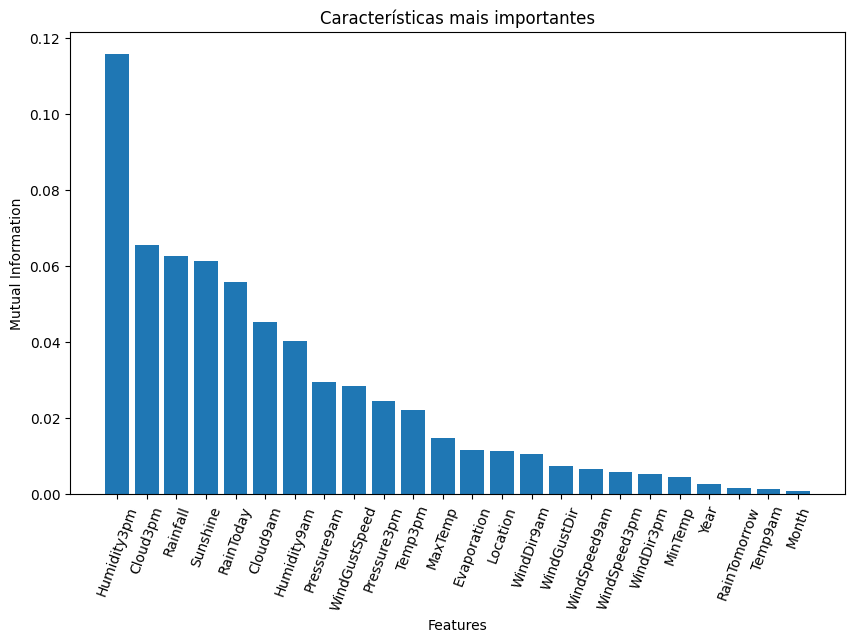

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_scaled, y)

indices_sorted = mutual_info.argsort()[::-1]
features_sorted = dataframe.columns[indices_sorted]
mutual_info_sorted = mutual_info[indices_sorted]

plt.figure(figsize=(10, 6))
plt.bar(features_sorted, mutual_info_sorted)
plt.ylabel('Mutual Information')
plt.xlabel('Features')
plt.title('Características mais importantes')
plt.xticks(rotation=70) 
plt.show()

Como podemos ver no gráfico acim,a as principais catacterísticas do conjunto de dados são a Humidade às 3 da tarde (Humidity3pm), o quão o céu estão nublado às 3 da tarde (Cloud3pm), o quanto caiu de chuva no dia do registro (RainFall), a quantidade de luz solar no dia do registro (Sunshine) e se choveu ou não no dia do registro (RainToday).

Ou seja: Humidity3pm, Cloud3pm, RainFall, Sunshine e RainToday.

### Redimensionando para uma amostra significativa

Como o dataset possui um pouco mais de 142 mil registros, iria demorar tempo demais para executar isso tudo.

Sendo assim, vamos pegar apenas 1000 amostras (que é  uma quantidade significativa) para plotar o beeswarm shap.

/home/kelvin/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


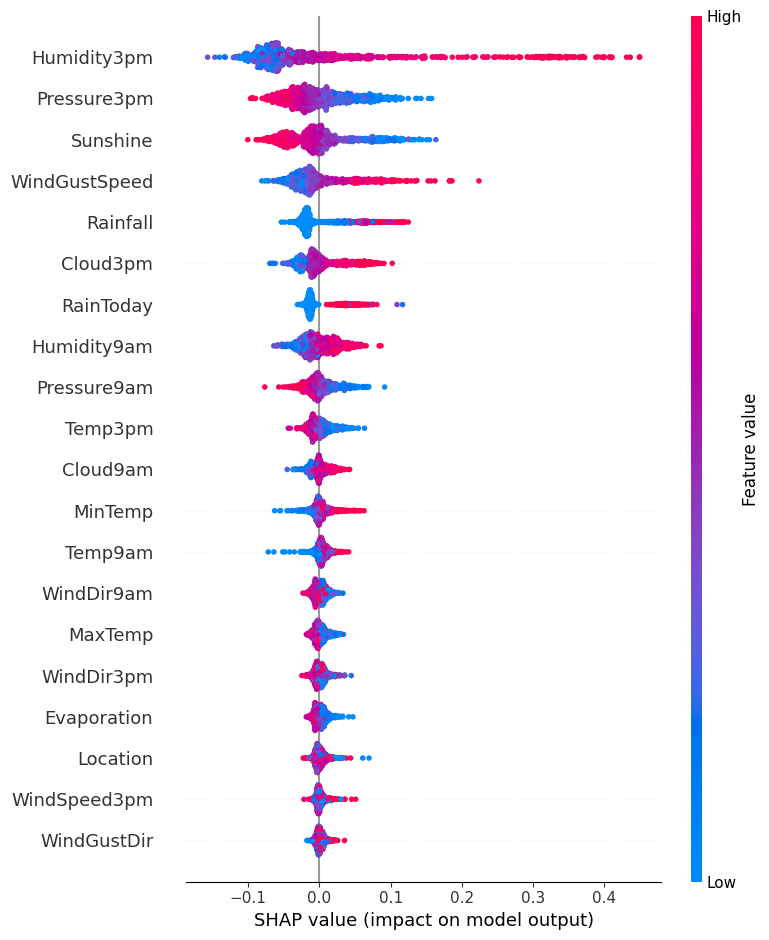

In [16]:
import shap
sample = shap.sample(X_test_scaled, 1000)
random_forest = RandomForestClassifier()
random_forest.fit(X_train_scaled, y_train)
explainer = shap.Explainer(random_forest)
shap_values = explainer(sample)[:, :, 1]
shap.summary_plot(shap_values, sample, feature_names=dataframe.columns)

Como podemos ver no gráfico acima, A humidade às 3 da tarde impacta de forma considerável se vai chover ou não amanhã.

Da mesma forma que, quanto mais baixa a pressão do ar às 3 da tarde, maior a probabilidade de chuva. E da mesma forma, quanto maior a pressão do ar, menor a probabilidade de chuva.

Temos também a quantidade de luz solar, que quanto menor no dia do registro, maior a probabilidade de chuva no dia seguinte.

Observando ambos os gráficos, tanto no de barras quanto no beeswarm, temos que as características mais importantes são a Humidity3pm, a Sunshine, e a pressão do ar às 3 da tarde (Pressure3pm).

### Apenas para fins de comparação

Vamos plotar também a mutual information para 1000 amostras.

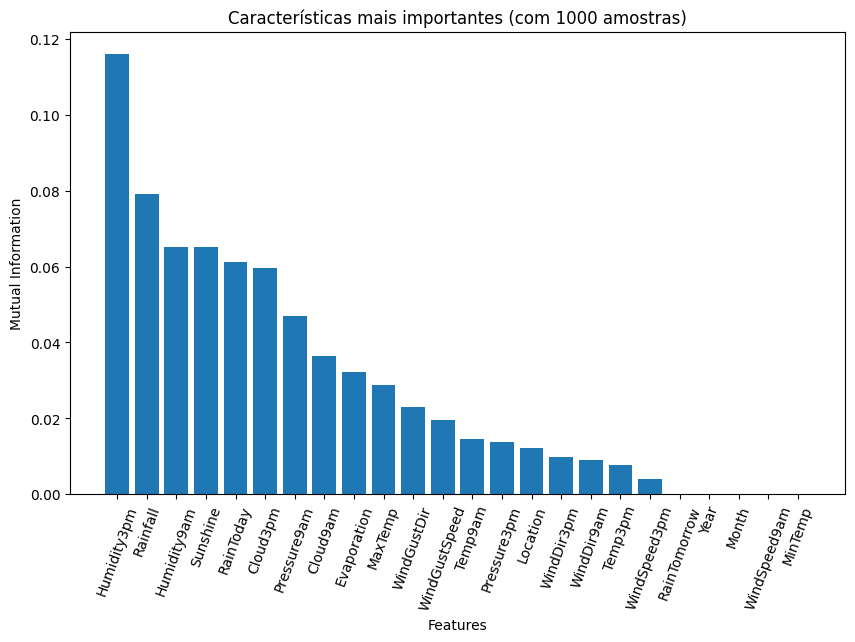

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import mutual_info_classif

# Selecionando uma amostra aleatória de 1000 amostras de X_scaled
sample_size = 1000
X_sample, _, y_sample, _ = train_test_split(X_scaled, y, train_size=sample_size, random_state=42)

# Calculando a informação mútua com a amostra
mutual_info = mutual_info_classif(X_sample, y_sample)

# Ordenando os resultados
indices_sorted = mutual_info.argsort()[::-1]
features_sorted = dataframe.columns[indices_sorted]
mutual_info_sorted = mutual_info[indices_sorted]

# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.bar(features_sorted, mutual_info_sorted)
plt.ylabel('Mutual Information')
plt.xlabel('Features')
plt.title('Características mais importantes (com 1000 amostras)')
plt.xticks(rotation=70)
plt.show()
